In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gomes555/blocos-de-carnaval-do-rio-de-janeiro")

print(" '/content/drive/MyDrive/teste", path)

100%|██████████| 28.8k/28.8k [00:00<00:00, 13.7MB/s]

Extracting files...
 '/content/drive/MyDrive/teste /root/.cache/kagglehub/datasets/gomes555/blocos-de-carnaval-do-rio-de-janeiro/versions/4


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Carregar o CSV
df = pd.read_csv('/content/drive/MyDrive/teste /Agenda_BL_Rua_Carnaval_Rio-2018_Imprensa.csv', sep=';')

# Mostrar todas as colunas
print("Colunas do CSV:")
for col in df.columns:
    print(col)

In [58]:
# Mostra os 5 primeiros registros de cada coluna
for coluna in df.columns:
    print(f"\n--- {coluna} ---")
    print(df[coluna].head())



--- Bloco  ---
0            Xodó da Piedade
1             Bloco do Limão
2    Seu Kuka é Eu do Grajaú
3      Unidos do Rego Barros
4     Vou Treinar e Volto Já
Name: Bloco , dtype: object

--- Bairro ---
0           Piedade
1    Jardim América
2            Grajaú
3      Santo Cristo
4           Tijuca 
Name: Bairro, dtype: object

--- Região ---
0    Zona Norte 2
1    Zona Norte 2
2    Tijuca e Adj
3          Centro
4    Tijuca e Adj
Name: Região, dtype: object

--- Data ---
0   2018-07-01
1          NaT
2          NaT
3          NaT
4          NaT
Name: Data, dtype: datetime64[ns]

--- Data Relativa ---
0    Domingo - 5 semanas antes do Carnaval
1     Sábado - 4 semanas antes do Carnaval
2     Sábado – 4 semanas antes do Carnaval
3                        Terça de Carnaval
4     Sábado - 4 semanas antes do Carnaval
Name: Data Relativa, dtype: object

--- Concentração ---
0    16:00:00
1    16:00:00
2    16:00:00
3    16:00:00
4    15:00:00
Name: Concentração, dtype: object

--- Desfil

In [57]:
# Ajustar nomes exatos das colunas
coluna_bloco = "Bloco "
coluna_data = "Data"
coluna_bairro = "Bairro"

# Converter coluna de data
df[coluna_data] = pd.to_datetime(df[coluna_data], errors="coerce")

# --- Frequência de blocos por dia ---
freq_dia = df.groupby(coluna_data)[coluna_bloco].count().reset_index()
freq_dia.columns = ["Data", "Qtd_Blocos"]


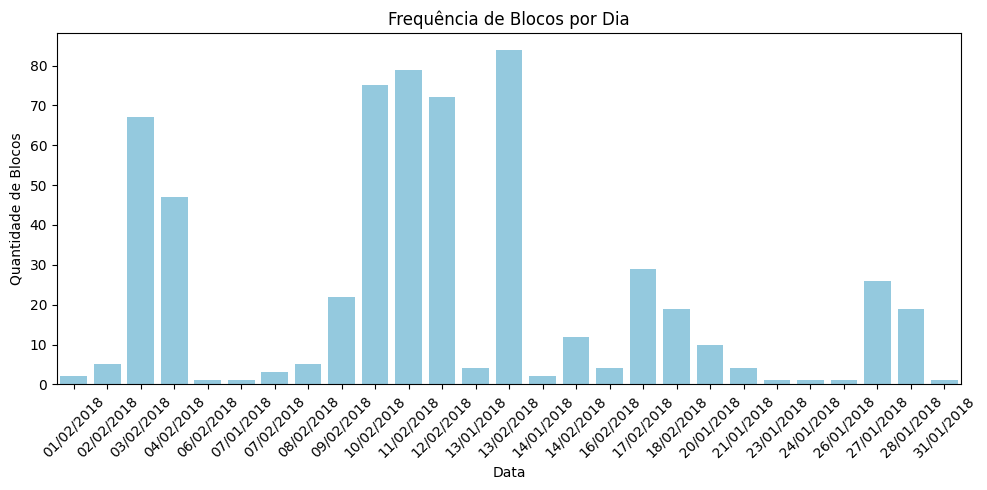

In [56]:

# --- Gráfico: Frequência de blocos por dia ---
plt.figure(figsize=(10,5))
sns.barplot(data=freq_por_dia, x='Data', y='Quantidade de Blocos', color='skyblue')
plt.xticks(rotation=45)
plt.title('Frequência de Blocos por Dia')
plt.xlabel('Data')
plt.ylabel('Quantidade de Blocos')
plt.tight_layout()
plt.show()


In [53]:
# --- Quantidade de blocos por bairro ---
blocos_bairro = df.groupby("Bairro")[coluna_bloco].count().reset_index()
blocos_bairro.columns = ["Bairro", "Qtd_Blocos"]

# --- Percentual de concentração ---
total_blocos = blocos_bairro["Qtd_Blocos"].sum()
blocos_bairro["Percentual"] = (blocos_bairro["Qtd_Blocos"] / total_blocos) * 100


/tmp/ipython-input-1783439368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=blocos_bairro, x="Bairro", y="Percentual", palette="viridis")


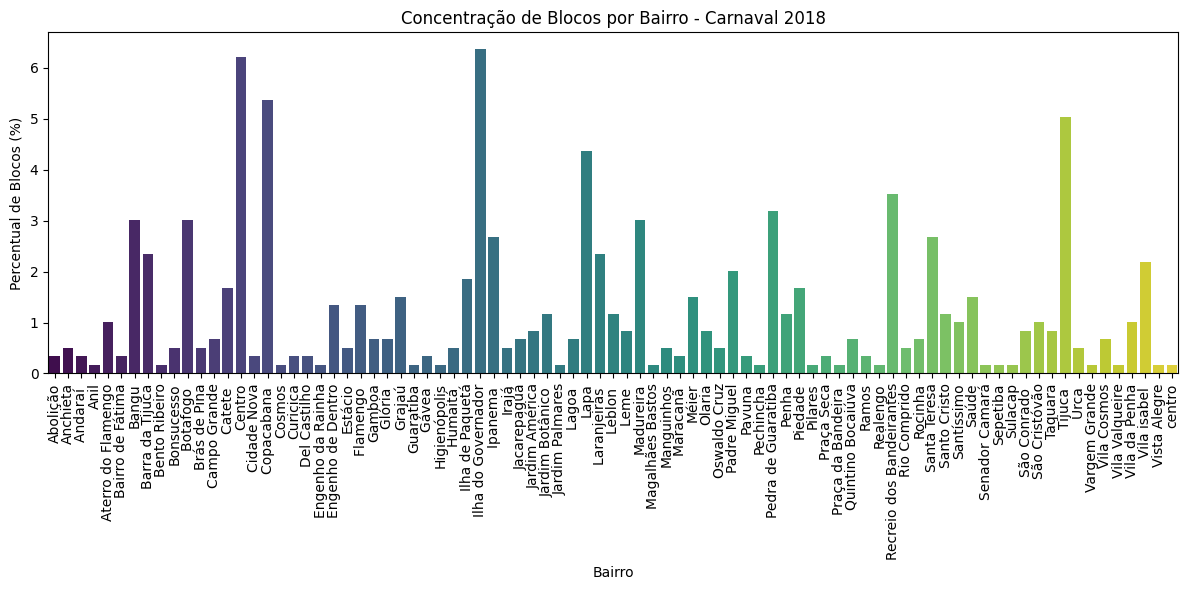

In [54]:
# Gráfico
plt.figure(figsize=(12,6))
sns.barplot(data=blocos_bairro, x="Bairro", y="Percentual", palette="viridis")
plt.xticks(rotation=90)
plt.title("Concentração de Blocos por Bairro - Carnaval 2018")
plt.xlabel("Bairro")
plt.ylabel("Percentual de Blocos (%)")
plt.tight_layout()
plt.show()